#                       TSFT  Project
- ###                                                              Submitted by- Sakshi Trivedi
- ###                                                               Subject: Time Series and Forecasting Techniques"
- ###               In Partial Fulfillment of the Requirements for the Post graduate diploma in management (2021-23) at Adani Institute of Digital Technology Management

- ###                                                       Under Guiadence of - Prof. Utkarsh Sharma Sir

    
# Title: Forecasting GDP of India

### Dataset Link-https://tinyurl.com/bdcx2eds -(Gross domestic product per capita in India)
<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1. [Introduction to Time-Series Analysis](#1)
2. [Time Series Analysis](#2) 
3. [Pre-Processing Data](#3)
4. [Plotting Graph](#4)
5. [Decomposition of data](#5)
6. [Data Smoothning](#6)
7. [Testing Stationarirty](#7)
8. [Slicing Data](#8)
9. [ACF & PACF](#9)
10. [Time Series Forecasting](#10)
11. [Finding Optimal ARIMA Model](#11)
12. [Applying Model](#12)
12. [Prediction](#13)
13. [Forecasting](#14)


# **1. Introduction to Time Series Forecasting** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

- A **time-series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.


- A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


- Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.

## **2. Time Series Analysis** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)
### Following are the Steps to perform:

 - Import Basic Libraries Required In The Jupyter Notebook
 - Import Data 
 - Plotting Data For Observation 
 - Pre-processing Data
 - Decomposition of data
 - Smoothing data (Rolling Mean & Standard Deviation Values)
 - Stationarity Of Data
 - Slicing data
 - Plot ACF And PACF 

## Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns 
df=pd.read_excel("E:\\TRIM 2 data\\GDP data.xlsx")

In [3]:
df

,Year,GDP
0,1960,82.188603
1,1961,85.354301
2,1962,89.881756
3,1963,101.126429
4,1964,115.537496
...,...,...
56,2016,1732.554242
57,2017,1980.667020
58,2018,1996.915087
59,2019,2100.751461


In [4]:
type(df.Year[0])

numpy.int64

In [5]:
type(df.Year[0])
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [6]:
# Indexing the data
df.index = df['Year']
del df['Year']
print(df.head())

                   GDP
Year                  
1960-01-01   82.188603
1961-01-01   85.354301
1962-01-01   89.881756
1963-01-01  101.126429
1964-01-01  115.537496


## **3.Pre-processing Data** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [6]:
df.isna().sum()

GDP    0
dtype: int64

In [7]:
# Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 1960-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


In [8]:
df.GDP.describe()

count      61.000000
mean      575.091644
std       582.933272
min        82.188603
25%       161.092092
50%       340.416835
75%       714.861015
max      2100.751461
Name: GDP, dtype: float64

In [9]:
test1 = df.value_counts()
test1.sort_values()

GDP        
82.188603      1
316.953927     1
89.881756      1
89.997304      1
96.339136      1
              ..
1732.554242    1
1900.706810    1
1980.667020    1
346.112888     1
2100.751461    1
Length: 61, dtype: int64

## **4.Plotting Graph**<a class="anchor" id="4"></a>
[Table of Contents](#0.1)

Text(0.5, 1.0, 'GDP of India 1960-2020')

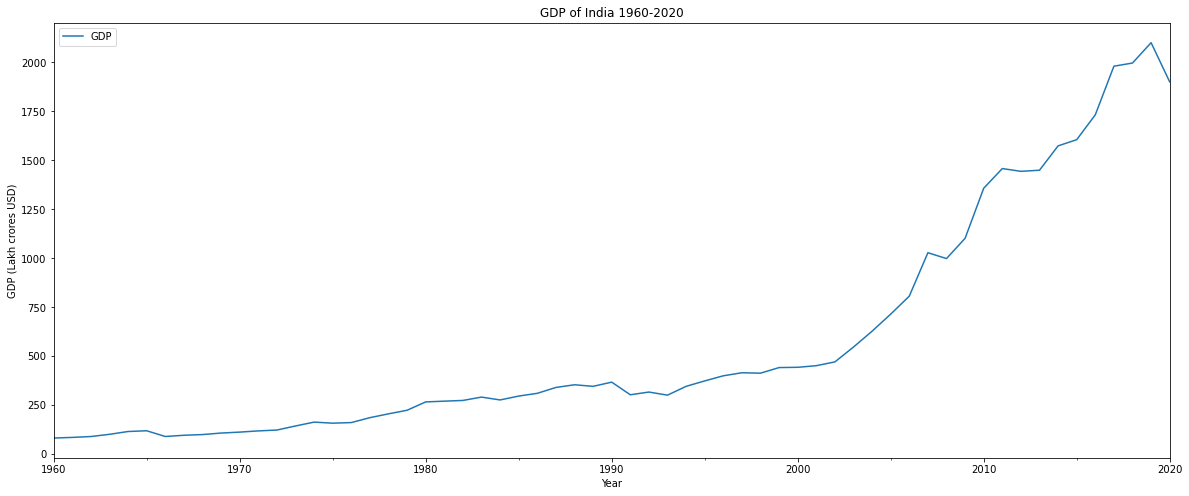

In [10]:
df.plot(figsize=(20,8),title="Graph Plot")
plt.legend(loc="best")
plt.ylabel("GDP (Lakh crores USD)")
plt.xlabel("Year")
plt.title("GDP of India 1960-2020")

## **5.Decomposition of data** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

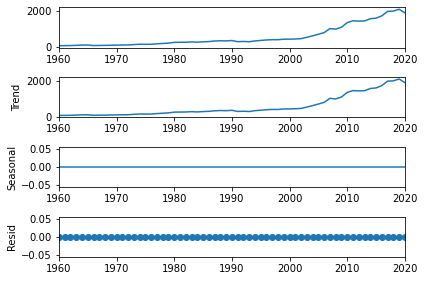

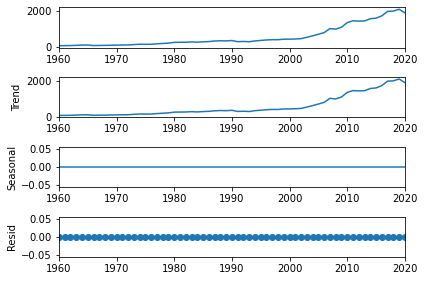

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
s=seasonal_decompose(df, model="additive")
s.plot()

## **6.Smoothing data (Rolling Mean & Standard Deviation Values)** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

In [12]:
rolling_mean = df.rolling(3).mean()
rolling_std = df.rolling(3).std()

[]

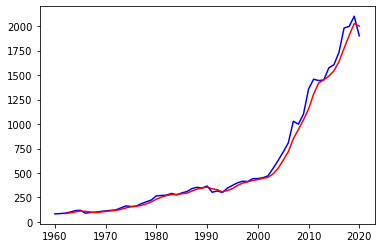

In [13]:
plt.plot(df, color="blue",label="Original GDP")
plt.plot(rolling_mean, color="red", label="Rolling Mean GDP")
plt.plot(figure=(20,8))

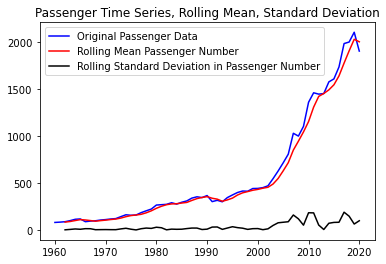

In [14]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

# **7. Stationary and Non-Stationary Time Series** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

- Now, we wil discuss **Stationary and Non-Stationary Time Series**. **Stationarity** is a property of a time series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.


- Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.


- A stationary time series is independent of seasonal effects as well.

**. How to test for stationarity?** 

- The stationarity of a series can be checked by looking at the plot of the series.
- Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
- There are multiple implementations of Unit Root tests like:


**1. Augmented Dickey Fuller test (ADF Test)**

**2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

### Augmented Dickey Fuller test (ADF Test)



- **Augmented Dickey Fuller test or (ADF Test)** is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

In [15]:
from statsmodels.tsa.stattools import adfuller
#test1
dftest = adfuller(df, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  2.232900095553836
2. P-Value :  0.9989085020765818
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 60
5. Critical Values :
	 1% :  -3.5443688564814813
	 5% :  -2.9110731481481484
	 10% :  -2.5931902777777776


- As p-value is greater than 0.5, we conclude that data is non-stationary

## **8.Slicing Data**<a class="anchor" id="8"></a>
[Table of Contents](#0.1)

In [16]:
size= int(len(df)*0.9)
size

54

In [17]:
train=df.iloc[:size+1]
test=df.iloc[size:]

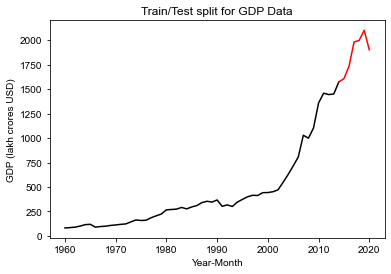

In [18]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for GDP Data")
plt.ylabel("GDP (lakh crores USD)")
plt.xlabel('Year-Month')
sns.set()
plt.show()

## **9. Autocorrelation and Partial Autocorrelation Functions** <a class="anchor" id="9"></a>
[Table of Contents](#0.1)

- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.


- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

##  Plotting ACF & PACF graphs

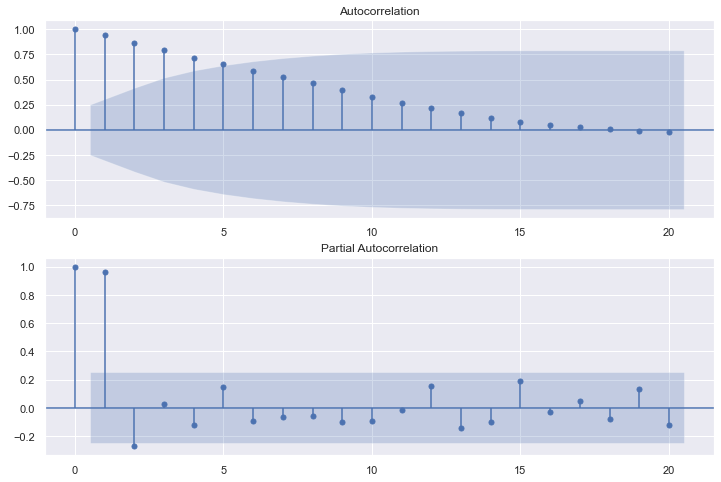

In [19]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)

## **10. Time Series Forecasting**<a class="anchor" id="10"></a>
[Table of Contents](#0.1)

**Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.

# Introduction to ARIMA Models

- **ARIMA** stands for **Autoregressive Integrated Moving Average Model**. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.


- So, **ARIMA**, short for **AutoRegressive Integrated Moving Average**, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.


- **ARIMA Models** are specified by three order parameters: (p, d, q), 

   where,

   - p is the order of the AR term

   - q is the order of the MA term

   - d is the number of differencing required to make the time series stationary
   
### **ARIMA model in words**:


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## **11. Finding optimal ARIMA Model using Auto-Arima** <a class="anchor" id="11"></a>
[Table of Contents](#0.1)

In [20]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to GDP dataset
stepwise_fit = auto_arima(df, start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore',
						suppress_warnings = True, 
						stepwise = True)

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=551.334, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=552.257, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=550.995, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=551.655, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=549.857, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=550.952, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=552.952, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=551.672, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=550.533, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=550.389, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=552.427, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=550.513, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.701 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   61
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -272.928
Date:                            Thu, 20 Jan 2022   AIC                            549.857
Time:                                    17:23:36   BIC                            553.599
Sample:                                         0   HQIC                           551.271
                                             - 61                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3099      0.125      2.476      0.013       0.065       0.555
sigma2      5074.9113    808.056      6.280      0.000    3491.151    6658.671
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 8.10
Prob(Q):                              0.75   Prob(JB):                         0.02
Heteroskedasticity (H):              29.65   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **12.Applying SARIMAX Model** <a class="anchor" id="12"></a>
[Table of Contents](#0.1)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(df, 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                GDP   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -272.688
Date:                            Thu, 20 Jan 2022   AIC                            555.375
Time:                                    17:23:37   BIC                            564.731
Sample:                                01-01-1960   HQIC                           558.911
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2735      0.121      2.254      0.024       0.036       0.511
ar.S.L12      -1.0759      8.847     -0.122      0.903     -18.415      16.264
ar.S.L24      -0.2366      1.254     -0.189      0.850      -2.695       2.222
ma.S.L12       0.9769     38.694      0.025      0.980     -74.862      76.816
sigma2      4647.8590   1.38e+05      0.034      0.973   -2.67e+05    2.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 8.94
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):              31.04   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **13.Predicting Values** <a class="anchor" id="13"></a>
[Table of Contents](#0.1)

<AxesSubplot:xlabel='Year'>

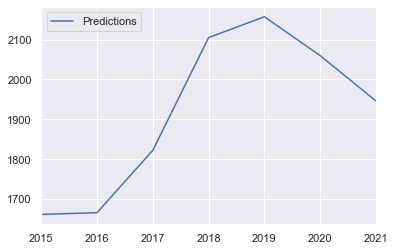

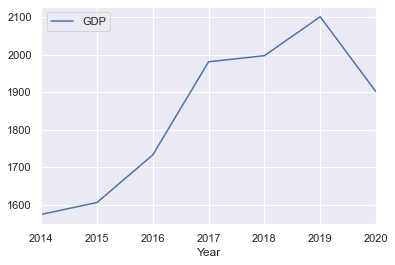

In [22]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test.plot(legend = True)

## **14. Forcasting Values with Graph** <a class="anchor" id="14"></a>
[Table of Contents](#0.1)

In [23]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test, predictions)

array([261.93192343, 258.94354136, 191.24018918, 324.78276855,
       368.51724128, 289.39581538, 217.00111842])

In [24]:
# Calculate mean squared error
mean_squared_error(test, predictions)

9170.136307843724

<AxesSubplot:xlabel='Year'>

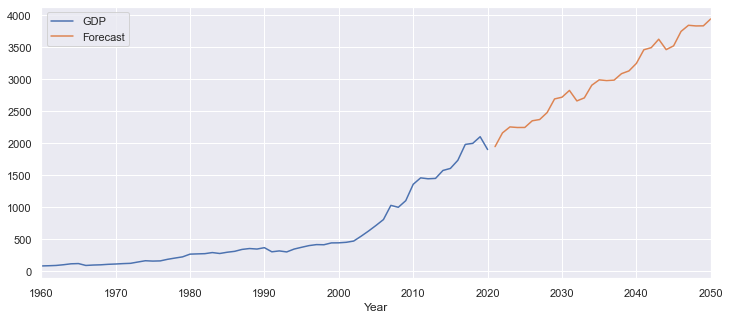

In [25]:
# Train the model on the full dataset
model = model = SARIMAX(df.GDP,
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 30 years
forecast = result.predict(start = len(df),
						end = (len(train)-1) + 3 *12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
df.plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [26]:
forecast #for next 30 years

2021-01-01    1945.956293
2022-01-01    2160.675601
2023-01-01    2253.888320
2024-01-01    2244.858732
2025-01-01    2245.499214
2026-01-01    2349.696444
2027-01-01    2369.390426
2028-01-01    2478.193164
2029-01-01    2690.972180
2030-01-01    2718.238791
2031-01-01    2823.957415
2032-01-01    2660.138558
2033-01-01    2707.262747
2034-01-01    2904.972727
2035-01-01    2989.071347
2036-01-01    2978.131679
2037-01-01    2984.844817
2038-01-01    3085.833417
2039-01-01    3128.881929
2040-01-01    3246.347977
2041-01-01    3459.043523
2042-01-01    3492.353034
2043-01-01    3623.906069
2044-01-01    3461.389190
2045-01-01    3520.264381
2046-01-01    3745.948701
2047-01-01    3841.587268
2048-01-01    3831.474234
2049-01-01    3832.857356
2050-01-01    3942.048860
Freq: AS-JAN, Name: Forecast, dtype: float64

# Thank You